In [1]:
import pandas as pd
from custom_functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump,load
from sklearn import metrics
import warnings
import dtale

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

### Variable Conventions
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

### File import 

In [2]:
df = pd.read_csv(r"D:\EKEEDA\Data\Mini Project ( 2 )\HR_Employee_Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

### Missing values

In [4]:
df.isna().mean()*100

Age                        0.0000
Attrition                  0.0000
BusinessTravel             0.0000
DailyRate                  0.0000
Department                 0.0000
DistanceFromHome           0.0000
Education                  0.0000
EducationField             0.0000
EmployeeCount              0.0000
EmployeeNumber             0.0000
EnvironmentSatisfaction    0.0000
Gender                     0.0000
HourlyRate                 0.0000
JobInvolvement             0.0000
JobLevel                   0.0000
JobRole                    0.0000
JobSatisfaction            0.0000
MaritalStatus              0.0000
MonthlyIncome              0.0000
MonthlyRate                0.0000
NumCompaniesWorked         0.0000
Over18                     0.0000
OverTime                   0.0000
PercentSalaryHike          0.0000
PerformanceRating          0.0000
RelationshipSatisfaction   0.0000
StandardHours              0.0000
StockOptionLevel           0.0000
TotalWorkingYears          0.0000
TrainingTimesL

### Chacking  Date types

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Setting employee columns as index

In [7]:
df.set_index('EmployeeNumber',inplace=True)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Imbalance Chacking 

In [9]:
df['Attrition'].value_counts()/len(df)*100

No    83.8776
Yes   16.1224
Name: Attrition, dtype: float64

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Replacing target variable into binary

In [11]:
df['Attrition'].replace({"Yes":1,"No":0},inplace=True)

In [12]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
df.shape

(1470, 34)

### Catagorisation of columns 

In [15]:
nominal_cols = ['Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

ordinal_cols = ['BusinessTravel','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
               'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

numeric_cols = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','NumCompaniesWorked',
               'PercentSalaryHike','StandardHours','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany',
               'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager','EmployeeCount']

target_cols = ['Attrition']

In [16]:
total_cols = len(nominal_cols)+len(ordinal_cols)+len(numeric_cols)+len(target_cols)
total_cols

34

### Checking for standard deviation and unique values

In [17]:
cols = []
sd_counts = []
dtype = []
for col in df.columns:
    cols.append(col)
    if df[col].dtypes == 'object':
        sd_counts.append(df[col].nunique())
        dtype.append('object')
    else :
        sd_counts.append(df[col].std())
        dtype.append('numeric')
        
sd_df = pd.DataFrame(list(zip(cols,dtype,sd_counts)),columns=['Columns','DataType','sd_counts'])    
sd_df.sort_values(by=['DataType','sd_counts'])

,Columns,DataType,sd_counts
8,EmployeeCount,numeric,0.0000
25,StandardHours,numeric,0.0000
23,PerformanceRating,numeric,0.3608
1,Attrition,numeric,0.3679
29,WorkLifeBalance,numeric,0.7065
12,JobInvolvement,numeric,0.7116
26,StockOptionLevel,numeric,0.8521
6,Education,numeric,1.0242
24,RelationshipSatisfaction,numeric,1.0812
9,EnvironmentSatisfaction,numeric,1.0931


In [18]:
df.drop(columns=['EmployeeCount','StandardHours','Over18'],inplace=True)

In [19]:
numeric_cols.remove('EmployeeCount')
numeric_cols.remove('StandardHours')
nominal_cols.remove('Over18')

### Information Values Check

In [20]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [21]:
pd.options.display.max_rows = 50

In [22]:
iv_woe(data=df,target='Attrition')[0]

,Variable,IV
0,Age,0.3107
0,BusinessTravel,0.1209
0,DailyRate,0.0769
0,Department,0.0522
0,DistanceFromHome,0.0765
0,Education,0.0165
0,EducationField,0.0728
0,EnvironmentSatisfaction,0.0999
0,Gender,0.0065
0,HourlyRate,0.0532


In [23]:
iv_woe(data=df,target='Attrition')[1]

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Age,"(17.999, 26.0]",162,56,0.2363,106,0.0860,1.0111,0.1520
1,Age,"(26.0, 29.0]",164,35,0.1477,129,0.1046,0.3447,0.0148
2,Age,"(29.0, 31.0]",129,27,0.1139,102,0.0827,0.3200,0.0100
3,Age,"(31.0, 34.0]",196,32,0.1350,164,0.1330,0.0150,0.0000
4,Age,"(34.0, 36.0]",147,16,0.0675,131,0.1062,-0.4535,0.0176
...,...,...,...,...,...,...,...,...,...
2,YearsWithCurrManager,"(2.0, 3.0]",142,19,0.0802,123,0.0998,-0.2186,0.0043
3,YearsWithCurrManager,"(3.0, 4.0]",98,11,0.0464,87,0.0706,-0.4189,0.0101
4,YearsWithCurrManager,"(4.0, 7.0]",276,39,0.1646,237,0.1922,-0.1554,0.0043
5,YearsWithCurrManager,"(7.0, 9.0]",171,16,0.0675,155,0.1257,-0.6217,0.0362


In [24]:
iv_result = iv_woe(data=df,target='Attrition')[0]
iv_result

,Variable,IV
0,Age,0.3107
0,BusinessTravel,0.1209
0,DailyRate,0.0769
0,Department,0.0522
0,DistanceFromHome,0.0765
0,Education,0.0165
0,EducationField,0.0728
0,EnvironmentSatisfaction,0.0999
0,Gender,0.0065
0,HourlyRate,0.0532


In [25]:
iv_result.sort_values(by ='IV')

,Variable,IV
0,PerformanceRating,0.0001
0,Gender,0.0065
0,YearsSinceLastPromotion,0.0164
0,Education,0.0165
0,RelationshipSatisfaction,0.0245
0,PercentSalaryHike,0.0440
0,Department,0.0522
0,HourlyRate,0.0532
0,MonthlyRate,0.0541
0,WorkLifeBalance,0.0670


In [26]:
pd.crosstab(df['PerformanceRating'],df['Attrition'])

Attrition,0,1
PerformanceRating,,
3,1044,200
4,189,37


In [27]:
pd.crosstab(df['PerformanceRating'],df['Attrition'],normalize='index')*100

Attrition,0,1
PerformanceRating,,
3,83.9228,16.0772
4,83.6283,16.3717


In [28]:
pd.crosstab(df['JobRole'],df['Attrition'],normalize='index')*100

Attrition,0,1
JobRole,,
Healthcare Representative,93.1298,6.8702
Human Resources,76.9231,23.0769
Laboratory Technician,76.0618,23.9382
Manager,95.0980,4.9020
Manufacturing Director,93.1034,6.8966
Research Director,97.5000,2.5000
Research Scientist,83.9041,16.0959
Sales Executive,82.5153,17.4847
Sales Representative,60.2410,39.7590


In [29]:
low_iv_vars = list(iv_result[iv_result['IV']<0.02]['Variable'])
low_iv_vars

['Education', 'Gender', 'PerformanceRating', 'YearsSinceLastPromotion']

### Droping low VI value columns  

In [30]:
df.drop(columns=['Education','Gender','PerformanceRating','YearsSinceLastPromotion'],inplace=True)

In [31]:
nominal_cols = [x for x in nominal_cols if x not in low_iv_vars]
ordinal_cols = [x for x in ordinal_cols if x not in low_iv_vars]
numeric_cols = [x for x in numeric_cols if x not in low_iv_vars]

In [32]:
df.shape

(1470, 27)

In [33]:
len(nominal_cols)+len(ordinal_cols)+len(numeric_cols)+len(target_cols)

27

### Ordinal columns Treting

In [34]:
ordinal_cols

['BusinessTravel',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [35]:
df[ordinal_cols]

,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
EmployeeNumber,,,,,,,,
1,Travel_Rarely,2,3,2,4,1,0,1
2,Travel_Frequently,3,2,2,2,4,1,3
4,Travel_Rarely,4,2,1,3,2,0,3
5,Travel_Frequently,4,3,1,3,3,0,3
7,Travel_Rarely,1,3,1,2,4,1,3
...,...,...,...,...,...,...,...,...
2061,Travel_Frequently,3,4,2,4,3,1,3
2062,Travel_Rarely,4,2,3,1,1,1,3
2064,Travel_Rarely,2,4,2,2,2,1,3


In [36]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [37]:
df['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2},inplace=True)

In [38]:
df['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2},inplace=True)

In [39]:
df['BusinessTravel'].value_counts()

1    1043
2     277
0     150
Name: BusinessTravel, dtype: int64

In [40]:
ordinal_cols

['BusinessTravel',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [41]:
df[ordinal_cols]

,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
EmployeeNumber,,,,,,,,
1,1,2,3,2,4,1,0,1
2,2,3,2,2,2,4,1,3
4,1,4,2,1,3,2,0,3
5,2,4,3,1,3,3,0,3
7,1,1,3,1,2,4,1,3
...,...,...,...,...,...,...,...,...
2061,2,3,4,2,4,3,1,3
2062,1,4,2,3,1,1,1,3
2064,1,2,4,2,2,2,1,3


### Nominal columns treting

In [42]:
nominal_cols

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [43]:
df[nominal_cols]

,Department,EducationField,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,
1,Sales,Life Sciences,Sales Executive,Single,Yes
2,Research & Development,Life Sciences,Research Scientist,Married,No
4,Research & Development,Other,Laboratory Technician,Single,Yes
5,Research & Development,Life Sciences,Research Scientist,Married,Yes
7,Research & Development,Medical,Laboratory Technician,Married,No
...,...,...,...,...,...
2061,Research & Development,Medical,Laboratory Technician,Married,No
2062,Research & Development,Medical,Healthcare Representative,Married,No
2064,Research & Development,Life Sciences,Manufacturing Director,Married,Yes


### One Hot Encodeing

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [45]:
#from sklearn.preprocessing import OneHotEncoder
#oh=OneHotEncoder(sparse='false',handle_unknown='ignore',dtype=int,drop='first')
#oh.fit(df[nominal_cols])
#oh_df = pd.DataFrame(oh.transform(df[nominal_cols]),columns=oh.get_feature_names(nominal_cols),index=df.index)
#oh_df = pd.DataFrame(oh.transform(df[nominal_cols]),columns=oh.get_feature_names(nominal_cols),index=df.index)

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False,handle_unknown='ignore',dtype=int,drop='first')
oh.fit(df[nominal_cols])
oh_df = pd.DataFrame(oh.transform(df[nominal_cols]),columns=oh.get_feature_names(nominal_cols),index=df.index)
oh_df

,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,
1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
5,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2062,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2064,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [46]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False,handle_unknown='ignore',dtype=int,drop='first')
oh.fit(df[nominal_cols])
oh_df = pd.DataFrame(oh.transform(df[nominal_cols]),columns=oh.get_feature_names(nominal_cols),index=df.index)
oh_df

,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,
1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
5,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2062,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2064,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [47]:
df.drop(columns=nominal_cols,inplace=True)

In [48]:
df=pd.concat([df,oh_df],axis=1)

In [49]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1,1102,1,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,5,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,49,0,2,279,8,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,7,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,37,1,1,1373,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
5,33,0,2,1392,3,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
7,27,0,1,591,2,1,40,3,1,2,3468,16632,9,12,4,1,6,3,3,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [50]:
df.shape

(1470, 40)

### Numaric columns treting

In [51]:
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [52]:
df[numeric_cols]

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,
1,41,1102,1,94,5993,19479,8,11,8,0,6,4,5
2,49,279,8,61,5130,24907,1,23,10,3,10,7,7
4,37,1373,2,92,2090,2396,6,15,7,3,0,0,0
5,33,1392,3,56,2909,23159,1,11,8,3,8,7,0
7,27,591,2,40,3468,16632,9,12,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,41,2571,12290,4,17,17,3,5,2,3
2062,39,613,6,42,9991,21457,4,15,9,5,7,7,7
2064,27,155,4,87,6142,5174,1,20,6,0,6,2,3


### Outlier Anylisis

In [54]:
from sklearn.covariance import EllipticEnvelope
model_ee = EllipticEnvelope(contamination=0.05)
model_ee.fit(df[numeric_cols])
df['enomaly_score'] = model_ee.predict(df[numeric_cols])
ee_index =list(df[df['enomaly_score']==-1].index)

In [55]:
len(ee_index)

74

In [56]:
df.drop(ee_index,inplace=True)

In [57]:
del df['enomaly_score']

In [58]:
df.shape

(1396, 40)

In [59]:
df[numeric_cols]

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,
1,41,1102,1,94,5993,19479,8,11,8,0,6,4,5
2,49,279,8,61,5130,24907,1,23,10,3,10,7,7
4,37,1373,2,92,2090,2396,6,15,7,3,0,0,0
5,33,1392,3,56,2909,23159,1,11,8,3,8,7,0
7,27,591,2,40,3468,16632,9,12,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,41,2571,12290,4,17,17,3,5,2,3
2062,39,613,6,42,9991,21457,4,15,9,5,7,7,7
2064,27,155,4,87,6142,5174,1,20,6,0,6,2,3


In [60]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1,1102,1,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,5,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,49,0,2,279,8,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,7,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,37,1,1,1373,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
5,33,0,2,1392,3,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
7,27,0,1,591,2,1,40,3,1,2,3468,16632,9,12,4,1,6,3,3,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [61]:
x=df.drop(columns=['Attrition'])
y=df['Attrition']

In [62]:
x.shape

(1396, 39)

### Train test split

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 1 to 2068
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1396 non-null   int64
 1   BusinessTravel                     1396 non-null   int64
 2   DailyRate                          1396 non-null   int64
 3   DistanceFromHome                   1396 non-null   int64
 4   EnvironmentSatisfaction            1396 non-null   int64
 5   HourlyRate                         1396 non-null   int64
 6   JobInvolvement                     1396 non-null   int64
 7   JobLevel                           1396 non-null   int64
 8   JobSatisfaction                    1396 non-null   int64
 9   MonthlyIncome                      1396 non-null   int64
 10  MonthlyRate                        1396 non-null   int64
 11  NumCompaniesWorked                 1396 non-null   int64
 12  PercentSalaryHike   

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [65]:
x_train.shape,y_train.shape

((1116, 39), (1116,))

In [66]:
x_test.shape,y_test.shape

((280, 39), (280,))

## Machin learning Algorithem.  

### 1) Random forest ml

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [69]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Reacall:',metrics.recall_score(y_test,y_pred))
print('f1_score:',metrics.f1_score(y_test,y_pred))

Accuracy: 0.85
Precision: 0.75
Reacall: 0.13043478260869565
f1_score: 0.22222222222222218


### Confusion matrics

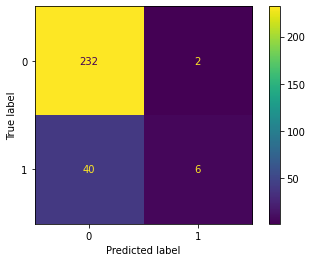

In [71]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,x_test,y_test)

In [72]:
metric_df =pd.DataFrame(columns=['Base_model','Accuracy','Precision','Recall','F1_score'])

In [73]:
metric_df.loc[len(metric_df)]=(['Rand_forest',metrics.accuracy_score(y_test,y_pred)
                               ,metrics.precision_score(y_test,y_pred)
                               ,metrics.recall_score(y_test,y_pred)
                               ,metrics.f1_score(y_test,y_pred)])
metric_df

,Base_model,Accuracy,Precision,Recall,F1_score
0,Rand_forest,0.8500,0.7500,0.1304,0.2222


### Haperparametric tunning on random forest

In [74]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split':  [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'random_state':[42]}

rf_gs = RandomizedSearchCV(RandomForestClassifier(),grid_params,verbose=3,random_state=42,scoring='recall',n_jobs=-1,cv=3,
                           n_iter=10)
rf_gs.fit(x_train,y_train)
rf_gs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'random_state': 42,
 'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [75]:
RandomForestClassifier(random_state= 42,
                       n_estimators= 2000,
                       min_samples_split= 2,
                       min_samples_leaf= 1,
                       max_features ='auto',
                       max_depth= 20,
                       bootstrap= False)
rf_gs.fit(x_train,y_train)
y_rf_gs_pred=rf_gs.predict(x_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [76]:
print('Accurecy:',metrics.accuracy_score(y_test,y_rf_gs_pred))
print('Precision:',metrics.precision_score(y_test,y_rf_gs_pred))
print('Recall:',metrics.recall_score(y_test,y_rf_gs_pred))
print('f1_score:',metrics.f1_score(y_test,y_rf_gs_pred))

Accurecy: 0.8571428571428571
Precision: 0.7142857142857143
Recall: 0.21739130434782608
f1_score: 0.3333333333333333


### Confusion matrics of Hyparparamer

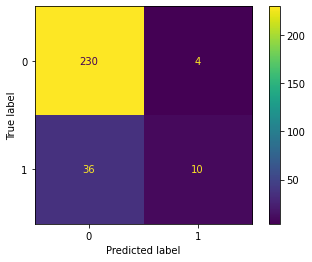

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_gs,x_test,y_test)

In [78]:
metric_df.loc[len(metric_df)]=(['optmized_rand',metrics.accuracy_score(y_test,y_rf_gs_pred)
                               ,metrics.precision_score(y_test,y_rf_gs_pred)
                               ,metrics.recall_score(y_test,y_rf_gs_pred) 
                               ,metrics.f1_score(y_test,y_rf_gs_pred)])
metric_df

,Base_model,Accuracy,Precision,Recall,F1_score
0,Rand_forest,0.8500,0.7500,0.1304,0.2222
1,optmized_rand,0.8571,0.7143,0.2174,0.3333


### 2) Adaboost ml

In [79]:
from sklearn.ensemble import AdaBoostClassifier
Adb=AdaBoostClassifier(random_state=42)
Adb.fit(x_train,y_train)
y_pred = Adb.predict(x_test)

In [80]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
print('Accuracy:',metrics.accuracy_score(y_pred,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))
print('F1_score:',metrics.f1_score(y_test,y_pred))

Accuracy: 1.0
Precision: 0.7073170731707317
Recall: 0.6304347826086957
F1_score: 0.6666666666666667


### Confusion matrics

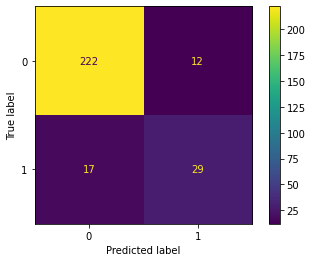

In [82]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Adb,x_test,y_test)

In [83]:
metric_df.loc[len(metric_df)]=(['Ada_boost',metrics.accuracy_score(y_pred,y_pred),metrics.precision_score(y_test,y_pred)
                               ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Base_model,Accuracy,Precision,Recall,F1_score
0,Rand_forest,0.8500,0.7500,0.1304,0.2222
1,optmized_rand,0.8571,0.7143,0.2174,0.3333
2,Ada_boost,1.0000,0.7073,0.6304,0.6667


### Hyparparameter tunning on Adaboost 

In [84]:
from sklearn.model_selection import RandomizedSearchCV
grid_params ={'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)],
               'learning_rate': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               'algorithm': ['SAMME', 'SAMME.R'],
               'random_state':[42]}

Ada_gs = RandomizedSearchCV(AdaBoostClassifier(),grid_params,random_state=42,verbose=3,scoring='f1',n_jobs=-1,n_iter=10)
Ada_gs.fit(x_train,y_train)
Ada_gs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'random_state': 42,
 'n_estimators': 1300,
 'learning_rate': 0.15,
 'algorithm': 'SAMME.R'}

In [85]:
Ada_gs = AdaBoostClassifier(random_state= 42,
                            n_estimators= 1300,
                            learning_rate= 0.15, 
                            algorithm ='SAMME.R')
Ada_gs.fit(x_train,y_train)
y_pred_Ada_gs=Ada_gs.predict(x_test)

In [86]:
print('Accuracy:',metrics.accuracy_score(y_pred,y_pred_Ada_gs))
print('Precision:',metrics.precision_score(y_pred,y_pred_Ada_gs))
print('Recall:',metrics.recall_score(y_pred,y_pred_Ada_gs))
print('F1_score:',metrics.f1_score(y_pred,y_pred_Ada_gs))

Accuracy: 0.9607142857142857
Precision: 0.9411764705882353
Recall: 0.7804878048780488
F1_score: 0.8533333333333334


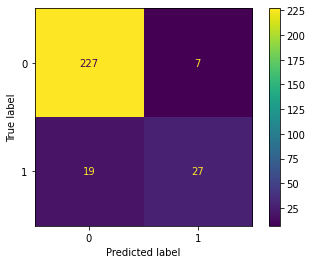

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Ada_gs,x_test,y_test)

In [88]:
metric_df.loc[len(metric_df)]=(["Ada_optmized",metrics.accuracy_score(y_pred,y_pred_Ada_gs)
                               ,metrics.precision_score(y_pred,y_pred_Ada_gs)
                               ,metrics.recall_score(y_pred,y_pred_Ada_gs)
                               ,metrics.f1_score(y_pred,y_pred_Ada_gs)])
metric_df

,Base_model,Accuracy,Precision,Recall,F1_score
0,Rand_forest,0.8500,0.7500,0.1304,0.2222
1,optmized_rand,0.8571,0.7143,0.2174,0.3333
2,Ada_boost,1.0000,0.7073,0.6304,0.6667
3,Ada_optmized,0.9607,0.9412,0.7805,0.8533


### 3) XgBoost ml

In [89]:
spw =df['Attrition'].value_counts()[0]/df['Attrition'].value_counts()[1]
spw

5.069565217391304

In [90]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=42,scale_pos_weight=spw)
xgb.fit(x_train,y_train)
y_pred =xgb.predict(x_test)

In [91]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
print('Accuracy:',metrics.accuracy_score(y_pred,y_pred))
print('Precision:',metrics.precision_score(y_pred,y_pred))
print('Recall:',metrics.recall_score(y_pred,y_pred))
print('F1_score:',metrics.f1_score(y_pred,y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0


### Confusion matrics

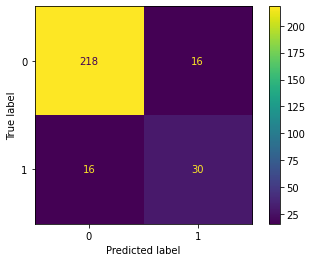

In [93]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,x_test,y_test)

In [94]:
metric_df.loc[len(metric_df)]=(["XGBoost",metrics.accuracy_score(y_pred,y_pred)
                               ,metrics.precision_score(y_pred,y_pred)
                               ,metrics.recall_score(y_pred,y_pred)
                               ,metrics.f1_score(y_pred,y_pred)])
metric_df

,Base_model,Accuracy,Precision,Recall,F1_score
0,Rand_forest,0.8500,0.7500,0.1304,0.2222
1,optmized_rand,0.8571,0.7143,0.2174,0.3333
2,Ada_boost,1.0000,0.7073,0.6304,0.6667
3,Ada_optmized,0.9607,0.9412,0.7805,0.8533
4,XGBoost,1.0000,1.0000,1.0000,1.0000


### Hyperparameter tunning

In [95]:
from sklearn.model_selection import RandomizedSearchCV 

grid_params= {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 19)],
               'eta': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               "subsample":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "colsample_bytree":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "max_depthRandomizedSearchCV":[int(x) for x in np.linspace(2, 20, num = 10)],
               "min_child_weight":[int(x) for x in np.linspace(1, 20, num = 20)],
               "gamma" : [i/10.0 for i in range(0,6)],
               "scale_pos_weight" : [spw],
              "random_state":[42]}

xgb_gs = RandomizedSearchCV(XGBClassifier(),grid_params,verbose=3,scoring='f1',n_jobs=-1,cv=3,n_iter=10)
xgb_gs.fit(x_train,y_train)
xgb_gs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[13:49:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depthRandomizedSearchCV" } are not used.



{'subsample': 0.9,
 'scale_pos_weight': 5.069565217391304,
 'random_state': 42,
 'n_estimators': 400,
 'min_child_weight': 9,
 'max_depthRandomizedSearchCV': 12,
 'gamma': 0.4,
 'eta': 0.05,
 'colsample_bytree': 0.55}

In [96]:
xgb_gs = XGBClassifier(subsample= 0.9,
                       scale_pos_weight= 5.069565217391304,
                       random_state= 42,
                       n_estimators=100,
                       min_child_weight= 11,
                       max_depthRandomizedSearchCV=16,
                       gamma= 0.2,
                       eta=0.1,
                       colsample_bytree= 0.7)

xgb_gs.fit(x_train,y_train)
y_pred_xgb=xgb_gs.predict(x_test)

[13:49:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depthRandomizedSearchCV" } are not used.



In [97]:
print('Accuracy:',metrics.accuracy_score(y_pred,y_pred_xgb))
print('Precision:',metrics.precision_score(y_pred,y_pred_xgb))
print('recall:',metrics.recall_score(y_pred,y_pred_xgb))
print('f1_score:',metrics.f1_score(y_pred,y_pred_xgb))

Accuracy: 0.9357142857142857
Precision: 0.7258064516129032
recall: 0.9782608695652174
f1_score: 0.8333333333333333


### Confusion matrice of hyperparameter tunning

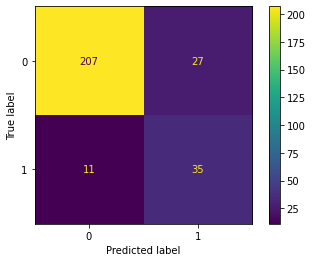

In [98]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_gs,x_test,y_test)

In [99]:
metric_df.loc[len(metric_df)]=(["Xgb_optmized",metrics.accuracy_score(y_pred,y_pred_xgb)
                               ,metrics.precision_score(y_pred,y_pred_xgb)
                               ,metrics.recall_score(y_pred,y_pred_xgb)
                               ,metrics.f1_score(y_pred,y_pred_xgb)])
metric_df

,Base_model,Accuracy,Precision,Recall,F1_score
0,Rand_forest,0.8500,0.7500,0.1304,0.2222
1,optmized_rand,0.8571,0.7143,0.2174,0.3333
2,Ada_boost,1.0000,0.7073,0.6304,0.6667
3,Ada_optmized,0.9607,0.9412,0.7805,0.8533
4,XGBoost,1.0000,1.0000,1.0000,1.0000
5,Xgb_optmized,0.9357,0.7258,0.9783,0.8333


In [100]:
import shap
explainer = shap.Explainer(xgb_gs.predict, x_test)
shap_values = explainer(x_test)

Permutation explainer: 281it [00:18,  7.72it/s]                                                                                                                                                                   


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

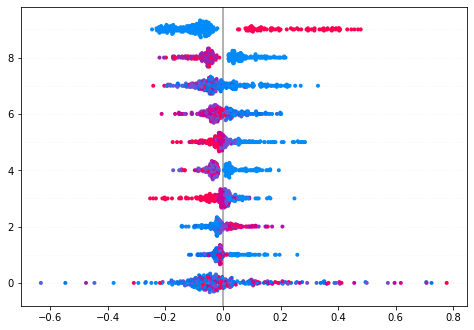

In [101]:
shap.plots.beeswarm(shap_values)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

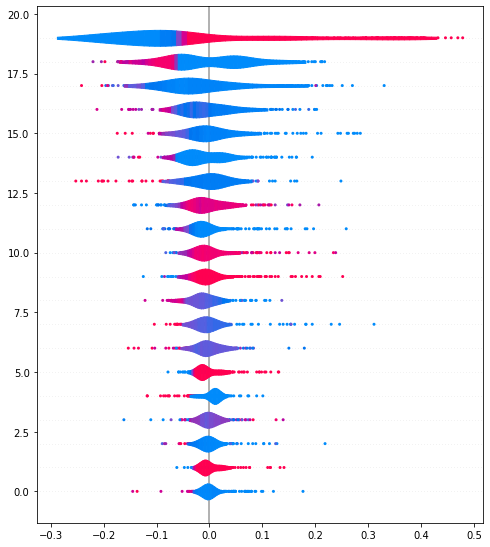

In [102]:
shap.summary_plot(shap_values, plot_type='violin')